<a href="https://colab.research.google.com/github/Chmounikaa/FMML_Project_and_labs/blob/main/mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [ ]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [ ]:
cancer.target_names

In [ ]:
cancer.frame

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [ ]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

In [ ]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [ ]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [ ]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [ ]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [ ]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

In [ ]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [ ]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
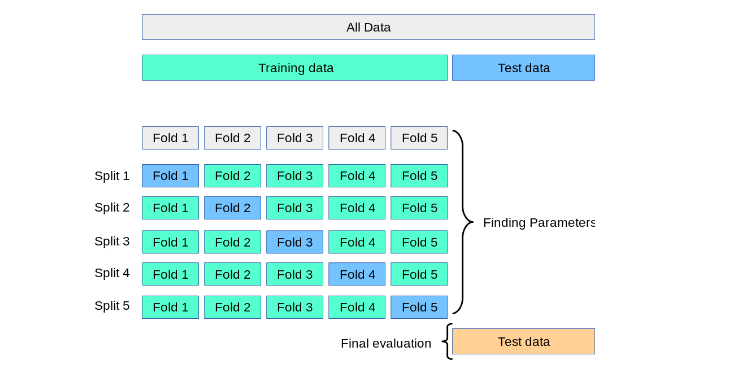

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [ ]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

In [ ]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [ ]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

In [ ]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain

# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [ ]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

In [ ]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [ ]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

In [ ]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values

In [ ]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.

K-Fold cross-validation is an exhaustive cross-validation method. In K-Fold cross-validation, the dataset is divided into k subsets (folds), and the model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set. The final performance metric is often computed by averaging the results of these k iterations.

Here's why K-Fold cross-validation is considered exhaustive:

Utilizes All Data:

In each iteration of K-Fold cross-validation, every data point is used for both training and validation exactly once. This ensures that the entire dataset is utilized for training and validation across the k iterations.
Robust Performance Estimate:

By repeatedly cycling through all the data in different combinations for training and validation, K-Fold cross-validation provides a more robust estimate of the model's performance. It helps in capturing the variability in the dataset and reduces the impact of a particular random split on the evaluation results.
Mitigates Overfitting or Selection Bias:

Since the model is evaluated on multiple validation sets, the risk of overfitting to a specific subset of the data is reduced. This is particularly important for ensuring that the model generalizes well to unseen data.
Statistical Significance:

The averaging of performance metrics over k folds provides a more statistically significant estimate of the model's generalization performance. This is especially valuable when working with limited datasets.
While K-Fold cross-validation is more computationally expensive than a single train-validation-test split, its exhaustiveness in utilizing the entire dataset for training and validation makes it a widely used and reliable method for model evaluation. However, it's essential to note that the choice of the value of k (number of folds) can impact the trade-off between computational cost and the reliability of the performance estimate. Common choices for k include 5-fold or 10-fold cross-validation.

Splitting a dataset into three sets (train, validation, and test sets) is a common alternative to using cross-validation. Each approach has its own set of pros and cons, and the choice between them depends on the specific characteristics of the data and the goals of the analysis. Here are some pros and cons of using a train-validation-test split:

Pros:

Computational Efficiency: Splitting the dataset into three sets is computationally less expensive than running k-fold cross-validation, especially when the size of the dataset is large. Training the model on a single training set and evaluating on separate validation and test sets can be faster.

Simplicity: The approach is simpler to implement and understand. It involves a straightforward division of the data into three parts without the need for iterative training and validation steps, which can be beneficial for quick experimentation.

Reduced Variability: With a fixed train-validation-test split, you get consistent training and validation sets, reducing variability in model performance evaluation. This can be advantageous when comparing models or tracking performance changes over time.Cons:

Limited Data Utilization: One of the significant drawbacks is that a portion of the data is reserved exclusively for testing, which means less data is available for training the model. This can lead to suboptimal model performance, especially when the dataset is small.

Sensitivity to Split: The performance metrics can be sensitive to how the dataset is divided. A different random split might result in different model performance, and this variability can be a concern, particularly with smaller datasets.

Risk of Overfitting to Validation Set: If the model is tuned based on the performance on the validation set, there is a risk of overfitting to the validation set. The model may not generalize well to new, unseen data if it has been overly optimized for the specific characteristics of the validation set.

Not Ideal for Small Datasets: In cases where the dataset is small, having a separate validation and test set can lead to a shortage of data for training, which may result in models that do not generalize well.

In conclusion, the choice between cross-validation and a train-validation-test split depends on factors like the size of the dataset, computational resources, and the goals of the analysis. Cross-validation is often preferred when there's a need for more robust model evaluation and when the dataset is limited. A train-validation-test split may be more suitable for larger datasets and when computational resources are constrained. It's essential to be aware of the trade-offs and choose the method that best fits the specific requirements of the problem at hand.

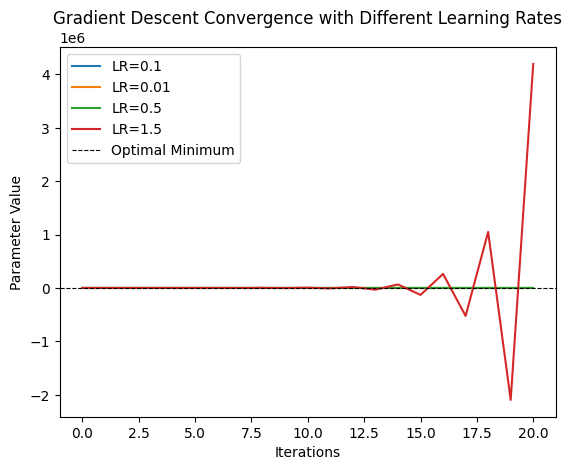

Optimal x for maximum: 1.9999999995925928
Maximum value: -0.0
Optimal x for maximum: 1.9999999995925928
Maximum value: -0.0


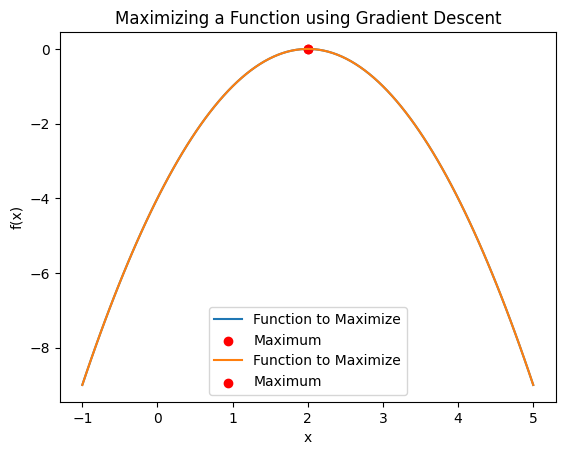

In [1]:
 import numpy as np
import matplotlib.pyplot as plt

# Function to optimize (example: quadratic function)
def cost_function(x):
    return x**2

# Gradient of the function
def gradient(x):
    return 2 * x

def gradient_descent(initial_x, learning_rate, iterations):
    x = initial_x
    x_history = [x]

    for i in range(iterations):
        x = x - learning_rate * gradient(x)
        x_history.append(x)

    return x_history

# Set parameters
initial_x = 4.0
iterations = 20

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.5, 1.5]

# Plot convergence for different learning rates
for lr in learning_rates:
    x_history = gradient_descent(initial_x, lr, iterations)
    plt.plot(range(iterations + 1), x_history, label=f'LR={lr}')

plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Optimal Minimum')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Gradient Descent Convergence with Different Learning Rates')
plt.legend()
plt.show()
 import numpy as np
import matplotlib.pyplot as plt

# Define the function you want to maximize
def f(x):
    return -(x**2 - 4*x + 4)  # Example function (you can replace this with your own)

# Define the derivative of the function (gradient)
def df(x):
    return -2*x + 4  # Derivative of the example function

# Gradient Descent Optimization
def gradient_descent_maximize(initial_x, learning_rate, num_iterations):
    x = initial_x

    for _ in range(num_iterations):
        gradient = df(x)
        x = x + learning_rate * gradient

    return x

# Initial values
initial_x = 0.0
learning_rate = 0.1
num_iterations = 100

# Run the optimization
optimal_x = gradient_descent_maximize(initial_x, learning_rate, num_iterations)

# Print the result
print("Optimal x for maximum:", optimal_x)
print("Maximum value:", f(optimal_x))

# Plotting the function and the result
x_vals = np.linspace(-1, 5, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='Function to Maximize')
plt.scatter(optimal_x, f(optimal_x), color='red', label='Maximum')
plt.legend()
 import numpy as np
import matplotlib.pyplot as plt

# Define the function you want to maximize
def f(x):
    return -(x**2 - 4*x + 4)  # Example function (you can replace this with your own)

# Define the derivative of the function (gradient)
def df(x):
    return -2*x + 4  # Derivative of the example function

# Gradient Descent Optimization
def gradient_descent_maximize(initial_x, learning_rate, num_iterations):
    x = initial_x

    for _ in range(num_iterations):
        gradient = df(x)
        x = x + learning_rate * gradient

    return x

# Initial values
initial_x = 0.0
learning_rate = 0.1
num_iterations = 100

# Run the optimization
optimal_x = gradient_descent_maximize(initial_x, learning_rate, num_iterations)

# Print the result
print("Optimal x for maximum:", optimal_x)
print("Maximum value:", f(optimal_x))

# Plotting the function and the result
x_vals = np.linspace(-1, 5, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='Function to Maximize')
plt.scatter(optimal_x, f(optimal_x), color='red', label='Maximum')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Maximizing a Function using Gradient Descent')
plt.show()

### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?  
2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
